<a href="https://colab.research.google.com/github/Carlos-Muniz/Boston-Housing-Regression/blob/master/Boston_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Regression

## Overview
1. Import Libraries
2. Load Data
3. Data Analysis
4. Model Classes
5. Training and Testing
6. Evaluation
7. Model Comparison
8. Conclusion



# Import Libaries

In [16]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as Data
from torch import optim
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
from matplotlib import pyplot as plt

# Load Data

In [78]:
boston = datasets.load_boston()
X, y = boston.data, boston.target
X = X.astype(np.float32)
y = y.astype(np.float32)

In [79]:
n_samples, n_features = X.shape
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data Analysis

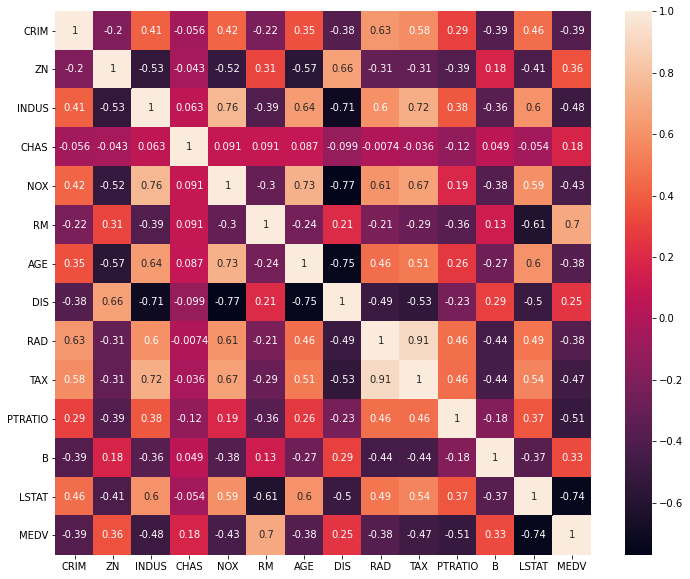

In [105]:
cols = list(boston.feature_names) + ['MEDV']
boston_df = pd.DataFrame(np.hstack([X, np.atleast_2d(y).T]), columns=cols)
plt.figure(figsize=(12,10))
sns.heatmap(boston_df.corr(), annot=True)
# print(X.shape, np.atleast_2d(y).T.shape)

We will be predicting **MEDV**. 

From the above Correlation table, we see that there are pretty significant negative correlations between LSTAT, PTRATIO, INDUS, and TAX and MEDV. There is one significant positive correlation between RM and MEDV. The rest of the variables are correlated but much less significantly.

# Model Classes

## Data Class

In [17]:
class DataMaker(Data.Dataset):
    def __init__(self, X, y):
        # scaler = StandardScaler()
        scaler = MinMaxScaler()
        self.targets = scaler.fit_transform(X.astype(np.float32))
        self.labels = y.astype(np.float32)
    
    def __getitem__(self, i):
        return self.targets[i, :], self.labels[i]

    def __len__(self):
        return len(self.targets)

## Neural Network Class

In [66]:
class Model(nn.Module):
    def __init__(self, n_features, hiddenA, hiddenB):
        super(Model, self).__init__()
        self.linearA = nn.Linear(n_features, hiddenA)
        self.linearB = nn.Linear(hiddenA, hiddenB)
        self.linearC = nn.Linear(hiddenB, 1)

    def forward(self, x):
        yA = F.relu(self.linearA(x))
        yB = F.relu(self.linearB(yA))
        return self.linearC(yB)

In [2]:
torch.manual_seed(1)

In [19]:
dataset = DataMaker(X, y)
train_size = int(0.70 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = Data.random_split(
    dataset, [train_size, test_size])

In [20]:
bs = 25
train_loader = Data.DataLoader(train_set, batch_size=bs, shuffle=True)
test_loader = Data.DataLoader(test_set, batch_size=bs, shuffle=True)

In [67]:
net = Model(n_features, 100, 50)

In [68]:
criterion = nn.MSELoss(size_average=False)
optimizer = optim.Adam(net.parameters(), lr=0.01)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Training and Testing

## Training

In [69]:
n_epochs = 200
all_losses = []
for epoch in range(n_epochs):
    progress_bar = tqdm.notebook.tqdm(train_loader, leave=False)
    losses = []
    total = 0
    for inputs, target in progress_bar:
        optimizer.zero_grad()
        y_pred = net(inputs)
        loss = criterion(y_pred, torch.unsqueeze(target,dim=1))

        loss.backward()
        
        optimizer.step()
        
        progress_bar.set_description(f'Loss: {loss.item():.3f}')
        
        losses.append(loss.item())
        total += 1

    epoch_loss = sum(losses) / total
    all_losses.append(epoch_loss)
                
    mess = f"Epoch #{epoch+1}\tLoss: {all_losses[-1]:.3f}"
    tqdm.tqdm.write(mess)

Epoch #1	Loss: 7983.891


Epoch #2	Loss: 2745.035


Epoch #3	Loss: 1278.972


Epoch #4	Loss: 1165.432


Epoch #5	Loss: 1016.749


Epoch #6	Loss: 886.323


Epoch #7	Loss: 710.218


Epoch #8	Loss: 641.749


Epoch #9	Loss: 660.861


Epoch #10	Loss: 522.443


Epoch #11	Loss: 476.140


Epoch #12	Loss: 482.051


Epoch #13	Loss: 467.732


Epoch #14	Loss: 467.011


Epoch #15	Loss: 537.540


Epoch #16	Loss: 424.406


Epoch #17	Loss: 420.030


Epoch #18	Loss: 390.749


Epoch #19	Loss: 384.733


Epoch #20	Loss: 433.925


Epoch #21	Loss: 425.966


Epoch #22	Loss: 364.030


Epoch #23	Loss: 375.333


Epoch #24	Loss: 385.392


Epoch #25	Loss: 414.120


Epoch #26	Loss: 374.599


Epoch #27	Loss: 364.414


Epoch #28	Loss: 343.151


Epoch #29	Loss: 338.706


Epoch #30	Loss: 327.467


Epoch #31	Loss: 332.634


Epoch #32	Loss: 324.312


Epoch #33	Loss: 304.188


Epoch #34	Loss: 304.657


Epoch #35	Loss: 309.946


Epoch #36	Loss: 290.984


Epoch #37	Loss: 288.532


Epoch #38	Loss: 307.034


Epoch #39	Loss: 287.532


Epoch #40	Loss: 257.581


Epoch #41	Loss: 259.205


Epoch #42	Loss: 276.093


Epoch #43	Loss: 274.277


Epoch #44	Loss: 295.754


Epoch #45	Loss: 248.253


Epoch #46	Loss: 230.655


Epoch #47	Loss: 237.064


Epoch #48	Loss: 233.920


Epoch #49	Loss: 238.056


Epoch #50	Loss: 211.065


Epoch #51	Loss: 206.789


Epoch #52	Loss: 213.953


Epoch #53	Loss: 208.196


Epoch #54	Loss: 217.394


Epoch #55	Loss: 215.665


Epoch #56	Loss: 231.311


Epoch #57	Loss: 193.988


Epoch #58	Loss: 224.653


Epoch #59	Loss: 208.629


Epoch #60	Loss: 184.488


Epoch #61	Loss: 183.694


Epoch #62	Loss: 203.276


Epoch #63	Loss: 233.317


Epoch #64	Loss: 205.150


Epoch #65	Loss: 185.969


Epoch #66	Loss: 184.563


Epoch #67	Loss: 178.940


Epoch #68	Loss: 176.606


Epoch #69	Loss: 196.757


Epoch #70	Loss: 179.479


Epoch #71	Loss: 201.050


Epoch #72	Loss: 163.195


Epoch #73	Loss: 169.309


Epoch #74	Loss: 176.956


Epoch #75	Loss: 190.058


Epoch #76	Loss: 168.953


Epoch #77	Loss: 162.363


Epoch #78	Loss: 174.322


Epoch #79	Loss: 169.297


Epoch #80	Loss: 225.765


Epoch #81	Loss: 211.779


Epoch #82	Loss: 184.252


Epoch #83	Loss: 214.467


Epoch #84	Loss: 192.282


Epoch #85	Loss: 204.120


Epoch #86	Loss: 161.712


Epoch #87	Loss: 154.947


Epoch #88	Loss: 165.623


Epoch #89	Loss: 158.286


Epoch #90	Loss: 143.235


Epoch #91	Loss: 138.727


Epoch #92	Loss: 149.716


Epoch #93	Loss: 147.281


Epoch #94	Loss: 152.522


Epoch #95	Loss: 152.610


Epoch #96	Loss: 138.134


Epoch #97	Loss: 166.641


Epoch #98	Loss: 177.177


Epoch #99	Loss: 206.791


Epoch #100	Loss: 166.931


Epoch #101	Loss: 166.400


Epoch #102	Loss: 138.471


Epoch #103	Loss: 144.661


Epoch #104	Loss: 164.047


Epoch #105	Loss: 151.151


Epoch #106	Loss: 176.611


Epoch #107	Loss: 174.347


Epoch #108	Loss: 182.423


Epoch #109	Loss: 160.439


Epoch #110	Loss: 159.325


Epoch #111	Loss: 126.643


Epoch #112	Loss: 135.702


Epoch #113	Loss: 148.686


Epoch #114	Loss: 161.403


Epoch #115	Loss: 157.075


Epoch #116	Loss: 130.423


Epoch #117	Loss: 134.028


Epoch #118	Loss: 127.140


Epoch #119	Loss: 139.764


Epoch #120	Loss: 142.061


Epoch #121	Loss: 131.342


Epoch #122	Loss: 139.410


Epoch #123	Loss: 129.629


Epoch #124	Loss: 140.556


Epoch #125	Loss: 144.677


Epoch #126	Loss: 134.836


Epoch #127	Loss: 116.559


Epoch #128	Loss: 117.804


Epoch #129	Loss: 121.277


Epoch #130	Loss: 119.391


Epoch #131	Loss: 137.167


Epoch #132	Loss: 114.378


Epoch #133	Loss: 108.198


Epoch #134	Loss: 116.632


Epoch #135	Loss: 136.300


Epoch #136	Loss: 137.403


Epoch #137	Loss: 123.343


Epoch #138	Loss: 118.318


Epoch #139	Loss: 119.740


Epoch #140	Loss: 126.922


Epoch #141	Loss: 128.384


Epoch #142	Loss: 134.436


Epoch #143	Loss: 129.274


Epoch #144	Loss: 115.563


Epoch #145	Loss: 107.413


Epoch #146	Loss: 113.448


Epoch #147	Loss: 127.172


Epoch #148	Loss: 121.508


Epoch #149	Loss: 136.777


Epoch #150	Loss: 137.761


Epoch #151	Loss: 120.687


Epoch #152	Loss: 118.855


Epoch #153	Loss: 114.055


Epoch #154	Loss: 120.220


Epoch #155	Loss: 117.150


Epoch #156	Loss: 108.923


Epoch #157	Loss: 118.080


Epoch #158	Loss: 105.806


Epoch #159	Loss: 103.970


Epoch #160	Loss: 104.470


Epoch #161	Loss: 110.751


Epoch #162	Loss: 125.229


Epoch #163	Loss: 114.053


Epoch #164	Loss: 113.330


Epoch #165	Loss: 108.073


Epoch #166	Loss: 100.303


Epoch #167	Loss: 111.579


Epoch #168	Loss: 112.551


Epoch #169	Loss: 112.884


Epoch #170	Loss: 108.553


Epoch #171	Loss: 113.546


Epoch #172	Loss: 95.793


Epoch #173	Loss: 94.074


Epoch #174	Loss: 94.887


Epoch #175	Loss: 100.102


Epoch #176	Loss: 95.227


Epoch #177	Loss: 115.052


Epoch #178	Loss: 111.898


Epoch #179	Loss: 100.072


Epoch #180	Loss: 126.319


Epoch #181	Loss: 109.521


Epoch #182	Loss: 144.682


Epoch #183	Loss: 130.391


Epoch #184	Loss: 99.736


Epoch #185	Loss: 107.519


Epoch #186	Loss: 111.340


Epoch #187	Loss: 97.596


Epoch #188	Loss: 136.022


Epoch #189	Loss: 100.051


Epoch #190	Loss: 94.402


Epoch #191	Loss: 96.869


Epoch #192	Loss: 136.554


Epoch #193	Loss: 93.347


Epoch #194	Loss: 97.693


Epoch #195	Loss: 105.320


Epoch #196	Loss: 94.656


Epoch #197	Loss: 80.742


Epoch #198	Loss: 84.348


Epoch #199	Loss: 86.519


Epoch #200	Loss: 85.169


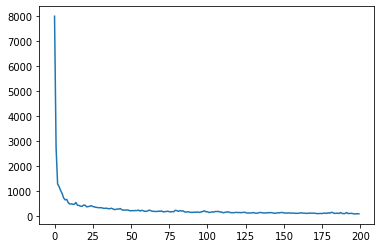

In [70]:
plt.plot(all_losses)

## Testing

In [71]:
y_pred = []
y_true = []
net.train(False)
for inputs, targets in test_loader:
    y_pred.extend(net(inputs).data.numpy())
    y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.plot([0, 50], [0, 50], '--k')

In [106]:
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("R^2:", r2_score(y_true, y_pred))

MAE: 2.102607
MSE: 9.830307
R^2: 0.9081291574884984


# Model Comparison

This model was used as an example in an Sklearn Demo titled: [Effect of transforming the targets in regression model](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py).

3.0770891510465486
19.295818944346795
0.8052077903940853


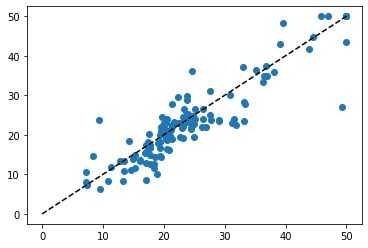

In [57]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
# X = dataset.data[:, np.logical_not(target)]
X = dataset.data
# y = dataset.data[:, target].squeeze()
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(
        n_quantiles=300, output_distribution='normal'))

regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot([0, 50], [0, 50], '--k')
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("R^2:", r2_score(y_true, y_pred))

# Conclusion

We can make an incomplete conclusion that the pytorch model is a better predictor than this Transformed Target Ridge Regression model, with built-in Cross validation.

This does not mean that Neural Networks are the best way to solve regression problems, or this problem.

In order to claim that, we would have to compare many different ML models, and also perform tuning the Neural Network's hyperparameters.